# Entrenamiento y Test

Para poder evaluar que tan bien puede generalizar el modelo que hemos entrenado con aprendizate supervizado, podemos dividir los datos en dos subconjuntos, una para entrenamiento y otro para test.

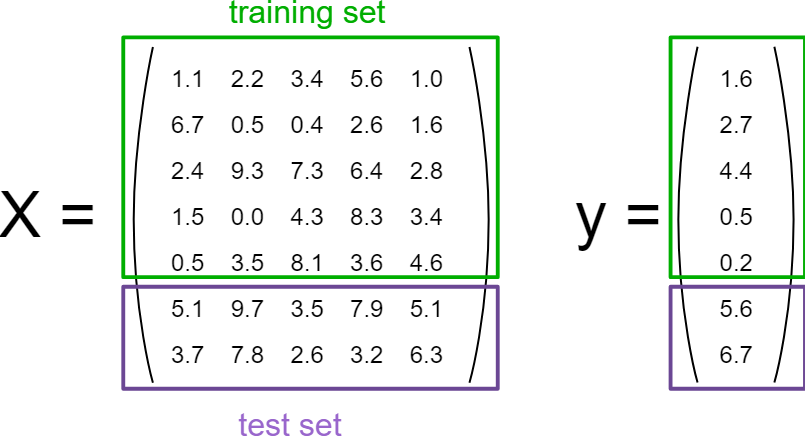

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

#
#    Pandas - Filtrar los datos
#             Nan, errores


X, y = iris.data, iris.target

<div class="alert alert-info">
Los sistemas del mundo real se entrenan utilizando los datos disponibles en ese momento y para nuevos datos, se debe tener la capacidad de predecir la salida con un margen reducido de error. Estos "nuevos" datos (datos futuros) pueden simularse al particionar los datos entre train/test. Los datos test serán usados para entrenar el modelo y los test para evaluar la capacidad de generalación del mismo (como se comportará con nuevos datos).
</div>


**NOTA:** Para el dataset de Iris (150 muestras) podemos pensar en dividirlo en 2/3 para train y 1/3 para test. Pero debido a la distribución de las muestras en el dataset, los datos de entrenamiento solo tendrían flores de la clase 0 y 1 (50 de clase 0 y 50 de clase 1), mientras que los de test, solo de la clase 2 (50 de la clase 2). Por esto, lo mejor es barajar aleatoriamente antes de hacer la división (Algo muy común en Machine Learning).

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**scikit-learn** tiene una función que ayuda a dividir los datos en los subconjuntos de train y test. Para este caso se usará el 50% para train y el 50% para test (pueden usarse otros porcentajes). Lo importante es realizar una evaluación con datos que el modelo no ha visto anteriormente.

In [11]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=123)

print("\nEtiquetas para Train y Test\n")
print(train_y)
print()
print(test_y)


Etiquetas para Train y Test

[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]

[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


<div class="alert alert-warning">
    <b>Partición Estratificada:</b> Cuando se trabaja con datasets pequeños, es mejor mantener la proporción entre los datos por clase que había originalemente.
</div>

En la división anterior se tienen las siguientes proporciones:

In [12]:
print(f'Todos: {np.bincount(y) / float(len(y)) * 100.0}' )
print(f'Entrenamiento: {np.bincount(train_y) / float(len(train_y)) * 100.0}')
print(f'Test: {np.bincount(test_y) / float(len(test_y)) * 100.0}')

Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [30.66666667 40.         29.33333333]
Test: [36.         26.66666667 37.33333333]


Para realizar la partición estratificada se tiene que incluir el array de etiquetas cuando se usa la función **train_test_split**.

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=123, stratify=y)

print(f'Todos: {np.bincount(y) / float(len(y)) * 100.0}' )
print(f'Entrenamiento: {np.bincount(train_y) / float(len(train_y)) * 100.0}')
print(f'Test: {np.bincount(test_y) / float(len(test_y)) * 100.0}')

Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


<div class="alert alert-danger">
    Si se evaluara el modelo con datos que se han empleado para entrenar, se obtendrían muy buenos resultados posiblemente porque el modelo pudo memorizar los datos de entrenamiento. Al presentar nuevos datos de pueden producir enormes fallos. Por esto en necesario dividir el dataset entre train y test.
</div>

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clasificador = KNeighborsClassifier()
clasificador.fit(train_X, train_y)

pred_y = clasificador.predict(test_X)

In [28]:
print("CCR [Accuracy]:")
print(np.mean(pred_y == test_y))

CCR [Accuracy]:
0.96


Visualizar aciertos y fallos

In [29]:
# np.where    Return elements chosen from x or y depending on condition.

print('Ejemplos correctamente clasificados:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Ejemplos correctamente clasificados:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Ejemplos incorrectamente clasificados:
[44 49 60]


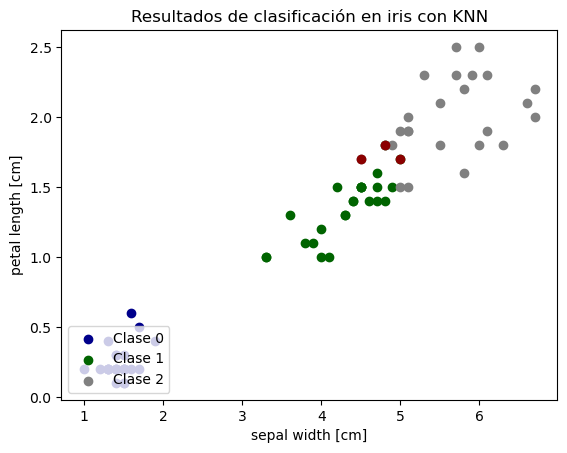

In [31]:
# Representar en 2D

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 2], test_X[idx, 3], color=color, label="Clase %s" % str(n))

plt.scatter(test_X[incorrect_idx, 2], test_X[incorrect_idx, 3], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()

In [32]:
print(test_y[incorrect_idx])
print(pred_y[incorrect_idx])

[1 1 2]
[2 2 1]


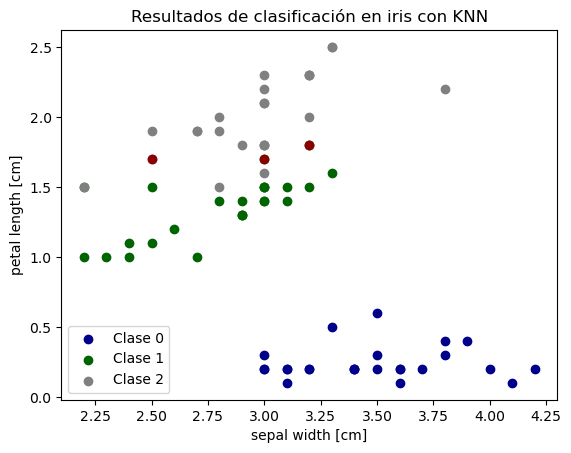

In [33]:
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 3], color=color, label="Clase %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 3], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()